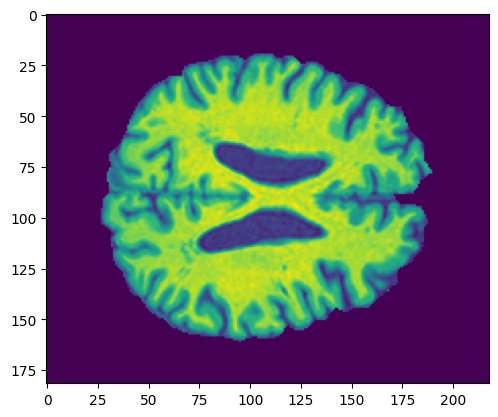

In [20]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

test_load = nib.load('dataset/mri-niftii/Control.nii.gz').get_fdata()
test_load.shape


test = test_load[:,:,100]
plt.imshow(test)
plt.show()

2D image detected - showing single slice


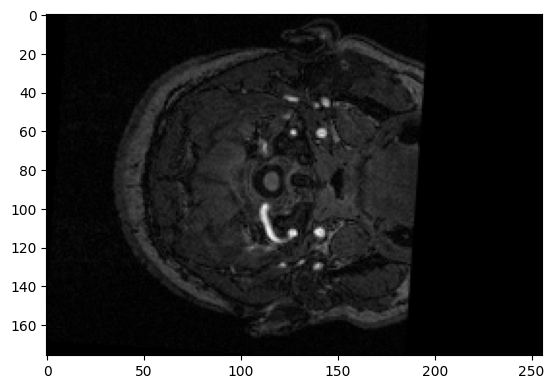

In [2]:
def plot_slices(data, start_slice=59, n_slices=5):
    try:
        if len(data.shape) == 2:
            print("2D image detected - showing single slice")
            plt.imshow(data, cmap='gray')
            plt.show()
        elif len(data.shape) == 3:
            fig, axes = plt.subplots(1, n_slices, figsize=(15, 3))
            for i in range(n_slices):
                slice_idx = start_slice + i
                if slice_idx < data.shape[2]:
                    axes[i].imshow(data[:, :, slice_idx], cmap='gray')
                    axes[i].set_title(f"Slice {slice_idx}")
                axes[i].axis('off')
            plt.show()
        else:
            print(f"Unsupported array shape: {data.shape}")
    except Exception as e:
        print(f"Error: {str(e)}")

# Usage:
plot_slices(test)

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def load_nifti(file_path):
    """Load NIfTI file and return data with affine"""
    img = nib.load(file_path)
    data = img.get_fdata()
    affine = img.affine
    return data, affine

def plot_orthogonal_views(volume, slice_x=None, slice_y=None, slice_z=None):
    """Plot orthogonal views of a 3D volume"""
    if slice_x is None:
        slice_x = volume.shape[0] // 2
    if slice_y is None:
        slice_y = volume.shape[1] // 2
    if slice_z is None:
        slice_z = volume.shape[2] // 2
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Sagittal view (X-axis)
    ax1.imshow(volume[slice_x, :, :].T, cmap='gray', origin='lower')
    ax1.set_title(f'Sagittal\nSlice {slice_x}/{volume.shape[0]}')
    ax1.axhline(slice_y, color='r', linestyle='--')
    ax1.axvline(slice_z, color='b', linestyle='--')
    
    # Coronal view (Y-axis)
    ax2.imshow(volume[:, slice_y, :].T, cmap='gray', origin='lower')
    ax2.set_title(f'Coronal\nSlice {slice_y}/{volume.shape[1]}')
    ax2.axhline(slice_x, color='r', linestyle='--')
    ax2.axvline(slice_z, color='b', linestyle='--')
    
    # Axial view (Z-axis)
    ax3.imshow(volume[:, :, slice_z].T, cmap='gray', origin='lower')
    ax3.set_title(f'Axial\nSlice {slice_z}/{volume.shape[2]}')
    ax3.axhline(slice_x, color='r', linestyle='--')
    ax3.axvline(slice_y, color='b', linestyle='--')
    
    plt.tight_layout()
    plt.show()

def interactive_viewer(volume):
    """Create interactive widget to explore all slices"""
    def update(sagittal_slice, coronal_slice, axial_slice):
        plot_orthogonal_views(volume, sagittal_slice, coronal_slice, axial_slice)
    
    interact(update,
             sagittal_slice=IntSlider(min=0, max=volume.shape[0]-1, step=1, value=volume.shape[0]//2),
             coronal_slice=IntSlider(min=0, max=volume.shape[1]-1, step=1, value=volume.shape[1]//2),
             axial_slice=IntSlider(min=0, max=volume.shape[2]-1, step=1, value=volume.shape[2]//2))    

In [ ]:
# Load your NIfTI file
nifti_file = "dataset/mri-niftii/subject01.nii"  # Replace with your file path
data, _ = load_nifti(nifti_file)
    
# Check if data is 3D
if len(data.shape) == 4:  # If 4D (e.g., fMRI), take first volume
      data = data[..., 0]
      print("4D data detected - using first volume")
    
print(f"Volume dimensions: {data.shape}")
    
# Display interactive viewer
interactive_viewer(data)
# Alternatively, display static mid-slices
# plot_orthogonal_views(data)

Volume dimensions: (176, 256, 256)


interactive(children=(IntSlider(value=88, description='sagittal_slice', max=175), IntSlider(value=128, descrip…